In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: GE
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


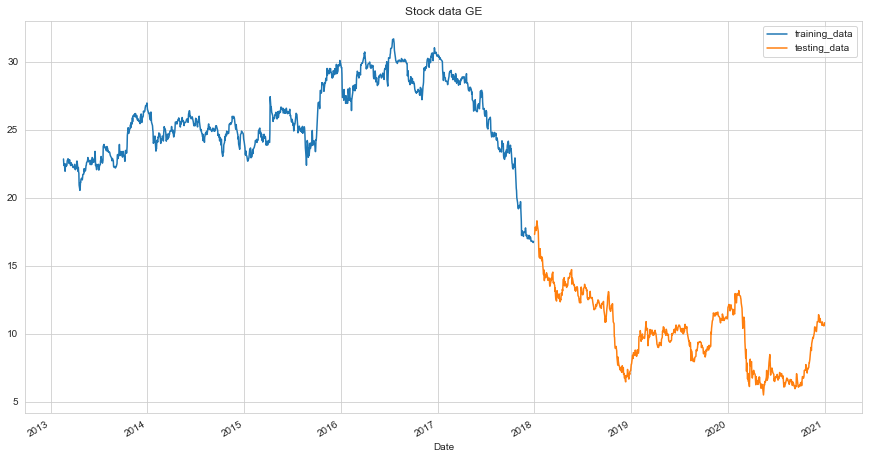

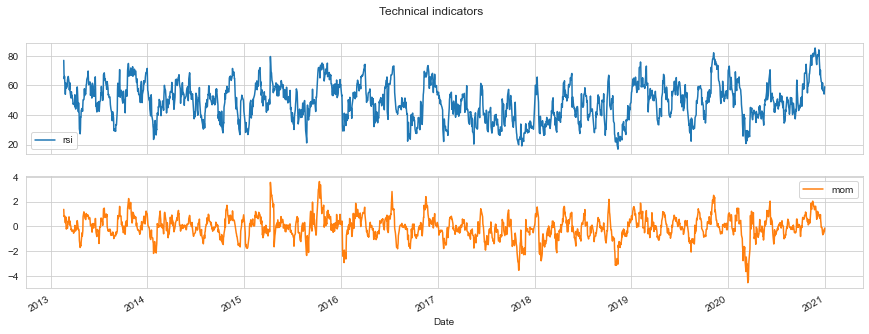

In [2]:
stock_name = 'ge'.upper()
industry = 'Industrial'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 994.99, duration: 0:00:00.360083
episode: 2/2000, episode end value: 970.57, duration: 0:00:00.368922
episode: 3/2000, episode end value: 942.70, duration: 0:00:00.310072
episode: 4/2000, episode end value: 938.25, duration: 0:00:00.368288
episode: 5/2000, episode end value: 991.68, duration: 0:00:00.310330
episode: 6/2000, episode end value: 964.41, duration: 0:00:00.255060
episode: 7/2000, episode end value: 962.47, duration: 0:00:00.273613
episode: 8/2000, episode end value: 972.71, duration: 0:00:00.344213
episode: 9/2000, episode end value: 935.27, duration: 0:00:00.330906
episode: 10/2000, episode end value: 1001.09, duration: 0:00:00.283573
episode: 11/2000, episode end value: 944.51, duration: 0:00:00.268059
episode: 12/2000, episode end value: 1011.03, duration: 0:00:00.299378
episode: 13/2000, episode end value: 1086.82, duration: 0:00:00.286062
episode: 14/2000, episode end value: 971.14, duration: 0:00:00.307959
episode: 15/2000, episode 

episode: 118/2000, episode end value: 967.63, duration: 0:00:00.445036
episode: 119/2000, episode end value: 986.54, duration: 0:00:00.418096
episode: 120/2000, episode end value: 1001.92, duration: 0:00:00.381083
episode: 121/2000, episode end value: 927.11, duration: 0:00:00.343635
episode: 122/2000, episode end value: 1004.13, duration: 0:00:00.342536
episode: 123/2000, episode end value: 967.74, duration: 0:00:00.349332
episode: 124/2000, episode end value: 974.09, duration: 0:00:00.344871
episode: 125/2000, episode end value: 950.86, duration: 0:00:00.357514
episode: 126/2000, episode end value: 1062.21, duration: 0:00:00.340217
episode: 127/2000, episode end value: 924.23, duration: 0:00:00.386005
episode: 128/2000, episode end value: 1005.12, duration: 0:00:00.412035
episode: 129/2000, episode end value: 987.56, duration: 0:00:00.392059
episode: 130/2000, episode end value: 951.88, duration: 0:00:00.351859
episode: 131/2000, episode end value: 939.41, duration: 0:00:00.394682
ep

episode: 234/2000, episode end value: 960.99, duration: 0:00:00.482899
episode: 235/2000, episode end value: 1003.58, duration: 0:00:00.453857
episode: 236/2000, episode end value: 980.19, duration: 0:00:00.461168
episode: 237/2000, episode end value: 968.79, duration: 0:00:00.429998
episode: 238/2000, episode end value: 941.75, duration: 0:00:00.417838
episode: 239/2000, episode end value: 1031.04, duration: 0:00:00.406805
episode: 240/2000, episode end value: 901.52, duration: 0:00:00.418007
episode: 241/2000, episode end value: 965.07, duration: 0:00:00.448409
episode: 242/2000, episode end value: 1116.11, duration: 0:00:00.423439
episode: 243/2000, episode end value: 873.39, duration: 0:00:00.365127
episode: 244/2000, episode end value: 961.94, duration: 0:00:00.404350
episode: 245/2000, episode end value: 949.24, duration: 0:00:00.432547
episode: 246/2000, episode end value: 933.65, duration: 0:00:00.372471
episode: 247/2000, episode end value: 1050.46, duration: 0:00:00.484244
ep

episode: 350/2000, episode end value: 957.51, duration: 0:00:00.356934
episode: 351/2000, episode end value: 978.27, duration: 0:00:00.420428
episode: 352/2000, episode end value: 951.68, duration: 0:00:00.432923
episode: 353/2000, episode end value: 959.04, duration: 0:00:00.479328
episode: 354/2000, episode end value: 988.96, duration: 0:00:00.391064
episode: 355/2000, episode end value: 964.73, duration: 0:00:00.381816
episode: 356/2000, episode end value: 963.76, duration: 0:00:00.543465
episode: 357/2000, episode end value: 988.80, duration: 0:00:00.517516
episode: 358/2000, episode end value: 1018.71, duration: 0:00:00.423588
episode: 359/2000, episode end value: 995.13, duration: 0:00:00.495911
episode: 360/2000, episode end value: 970.25, duration: 0:00:00.482200
episode: 361/2000, episode end value: 1026.17, duration: 0:00:00.312997
episode: 362/2000, episode end value: 964.55, duration: 0:00:00.373464
episode: 363/2000, episode end value: 1010.33, duration: 0:00:00.379920
epi

episode: 466/2000, episode end value: 931.06, duration: 0:00:00.392156
episode: 467/2000, episode end value: 964.90, duration: 0:00:00.460145
episode: 468/2000, episode end value: 955.01, duration: 0:00:00.410513
episode: 469/2000, episode end value: 964.18, duration: 0:00:00.423251
episode: 470/2000, episode end value: 956.75, duration: 0:00:00.446220
episode: 471/2000, episode end value: 1152.68, duration: 0:00:00.413960
episode: 472/2000, episode end value: 882.03, duration: 0:00:00.426838
episode: 473/2000, episode end value: 999.86, duration: 0:00:00.383125
episode: 474/2000, episode end value: 934.05, duration: 0:00:00.289352
episode: 475/2000, episode end value: 880.34, duration: 0:00:00.428929
episode: 476/2000, episode end value: 969.43, duration: 0:00:00.480950
episode: 477/2000, episode end value: 1008.00, duration: 0:00:00.493075
episode: 478/2000, episode end value: 1030.78, duration: 0:00:00.465150
episode: 479/2000, episode end value: 956.08, duration: 0:00:00.374623
epi

episode: 582/2000, episode end value: 950.92, duration: 0:00:00.463219
episode: 583/2000, episode end value: 906.05, duration: 0:00:00.414584
episode: 584/2000, episode end value: 940.39, duration: 0:00:00.398231
episode: 585/2000, episode end value: 951.86, duration: 0:00:00.444660
episode: 586/2000, episode end value: 929.71, duration: 0:00:00.372042
episode: 587/2000, episode end value: 955.33, duration: 0:00:00.439774
episode: 588/2000, episode end value: 933.67, duration: 0:00:00.421140
episode: 589/2000, episode end value: 911.71, duration: 0:00:00.299486
episode: 590/2000, episode end value: 972.94, duration: 0:00:00.356102
episode: 591/2000, episode end value: 964.73, duration: 0:00:00.351512
episode: 592/2000, episode end value: 969.42, duration: 0:00:00.302372
episode: 593/2000, episode end value: 955.41, duration: 0:00:00.359795
episode: 594/2000, episode end value: 1021.40, duration: 0:00:00.374532
episode: 595/2000, episode end value: 984.43, duration: 0:00:00.352788
episo

episode: 698/2000, episode end value: 948.78, duration: 0:00:00.407825
episode: 699/2000, episode end value: 1028.09, duration: 0:00:00.319851
episode: 700/2000, episode end value: 931.13, duration: 0:00:00.340540
episode: 701/2000, episode end value: 972.93, duration: 0:00:00.322033
episode: 702/2000, episode end value: 982.29, duration: 0:00:00.407941
episode: 703/2000, episode end value: 994.34, duration: 0:00:00.401697
episode: 704/2000, episode end value: 962.95, duration: 0:00:00.374628
episode: 705/2000, episode end value: 959.51, duration: 0:00:00.459657
episode: 706/2000, episode end value: 962.23, duration: 0:00:00.397912
episode: 707/2000, episode end value: 962.78, duration: 0:00:00.444891
episode: 708/2000, episode end value: 1002.34, duration: 0:00:00.374350
episode: 709/2000, episode end value: 982.37, duration: 0:00:00.420557
episode: 710/2000, episode end value: 978.46, duration: 0:00:00.332120
episode: 711/2000, episode end value: 994.48, duration: 0:00:00.422545
epis

episode: 814/2000, episode end value: 949.02, duration: 0:00:00.451149
episode: 815/2000, episode end value: 1012.83, duration: 0:00:00.347994
episode: 816/2000, episode end value: 950.40, duration: 0:00:00.379058
episode: 817/2000, episode end value: 971.31, duration: 0:00:00.395559
episode: 818/2000, episode end value: 991.75, duration: 0:00:00.326974
episode: 819/2000, episode end value: 942.96, duration: 0:00:00.348804
episode: 820/2000, episode end value: 946.92, duration: 0:00:00.410415
episode: 821/2000, episode end value: 1016.68, duration: 0:00:00.346377
episode: 822/2000, episode end value: 989.55, duration: 0:00:00.348500
episode: 823/2000, episode end value: 961.28, duration: 0:00:00.403218
episode: 824/2000, episode end value: 969.24, duration: 0:00:00.379498
episode: 825/2000, episode end value: 1007.21, duration: 0:00:00.345266
episode: 826/2000, episode end value: 1020.12, duration: 0:00:00.323649
episode: 827/2000, episode end value: 989.30, duration: 0:00:00.342560
ep

episode: 930/2000, episode end value: 971.28, duration: 0:00:00.387534
episode: 931/2000, episode end value: 1074.97, duration: 0:00:00.366866
episode: 932/2000, episode end value: 995.58, duration: 0:00:00.417178
episode: 933/2000, episode end value: 944.40, duration: 0:00:00.415234
episode: 934/2000, episode end value: 1004.13, duration: 0:00:00.377608
episode: 935/2000, episode end value: 923.18, duration: 0:00:00.416148
episode: 936/2000, episode end value: 1006.84, duration: 0:00:00.348014
episode: 937/2000, episode end value: 961.57, duration: 0:00:00.364361
episode: 938/2000, episode end value: 963.99, duration: 0:00:00.295696
episode: 939/2000, episode end value: 968.05, duration: 0:00:00.343208
episode: 940/2000, episode end value: 964.83, duration: 0:00:00.410591
episode: 941/2000, episode end value: 992.06, duration: 0:00:00.352638
episode: 942/2000, episode end value: 956.72, duration: 0:00:00.341076
episode: 943/2000, episode end value: 1133.40, duration: 0:00:00.466820
ep

episode: 1045/2000, episode end value: 939.07, duration: 0:00:00.459155
episode: 1046/2000, episode end value: 927.99, duration: 0:00:00.496716
episode: 1047/2000, episode end value: 967.61, duration: 0:00:00.416495
episode: 1048/2000, episode end value: 961.94, duration: 0:00:00.335124
episode: 1049/2000, episode end value: 983.55, duration: 0:00:00.429077
episode: 1050/2000, episode end value: 1002.70, duration: 0:00:00.386294
episode: 1051/2000, episode end value: 981.96, duration: 0:00:00.341773
episode: 1052/2000, episode end value: 964.77, duration: 0:00:00.374564
episode: 1053/2000, episode end value: 992.87, duration: 0:00:00.445785
episode: 1054/2000, episode end value: 965.20, duration: 0:00:00.319537
episode: 1055/2000, episode end value: 1016.33, duration: 0:00:00.426368
episode: 1056/2000, episode end value: 979.81, duration: 0:00:00.376739
episode: 1057/2000, episode end value: 979.74, duration: 0:00:00.439695
episode: 1058/2000, episode end value: 970.07, duration: 0:00:

episode: 1159/2000, episode end value: 970.93, duration: 0:00:00.309083
episode: 1160/2000, episode end value: 955.56, duration: 0:00:00.408157
episode: 1161/2000, episode end value: 957.60, duration: 0:00:00.304529
episode: 1162/2000, episode end value: 963.98, duration: 0:00:00.423589
episode: 1163/2000, episode end value: 949.05, duration: 0:00:00.449410
episode: 1164/2000, episode end value: 992.81, duration: 0:00:00.427840
episode: 1165/2000, episode end value: 877.39, duration: 0:00:00.388536
episode: 1166/2000, episode end value: 939.54, duration: 0:00:00.359783
episode: 1167/2000, episode end value: 1078.72, duration: 0:00:00.359510
episode: 1168/2000, episode end value: 901.97, duration: 0:00:00.324731
episode: 1169/2000, episode end value: 911.77, duration: 0:00:00.311501
episode: 1170/2000, episode end value: 950.93, duration: 0:00:00.485671
episode: 1171/2000, episode end value: 978.78, duration: 0:00:00.372370
episode: 1172/2000, episode end value: 976.37, duration: 0:00:0

episode: 1273/2000, episode end value: 1038.80, duration: 0:00:00.360584
episode: 1274/2000, episode end value: 954.05, duration: 0:00:00.406791
episode: 1275/2000, episode end value: 1067.17, duration: 0:00:00.388644
episode: 1276/2000, episode end value: 923.55, duration: 0:00:00.347712
episode: 1277/2000, episode end value: 957.76, duration: 0:00:00.410571
episode: 1278/2000, episode end value: 1027.02, duration: 0:00:00.402945
episode: 1279/2000, episode end value: 918.46, duration: 0:00:00.388853
episode: 1280/2000, episode end value: 973.18, duration: 0:00:00.347282
episode: 1281/2000, episode end value: 929.81, duration: 0:00:00.373669
episode: 1282/2000, episode end value: 996.77, duration: 0:00:00.361568
episode: 1283/2000, episode end value: 917.96, duration: 0:00:00.397657
episode: 1284/2000, episode end value: 973.66, duration: 0:00:00.413070
episode: 1285/2000, episode end value: 944.48, duration: 0:00:00.427506
episode: 1286/2000, episode end value: 930.45, duration: 0:00

episode: 1387/2000, episode end value: 969.90, duration: 0:00:00.377507
episode: 1388/2000, episode end value: 963.88, duration: 0:00:00.345000
episode: 1389/2000, episode end value: 968.01, duration: 0:00:00.374999
episode: 1390/2000, episode end value: 961.79, duration: 0:00:00.372829
episode: 1391/2000, episode end value: 961.58, duration: 0:00:00.430633
episode: 1392/2000, episode end value: 980.46, duration: 0:00:00.468512
episode: 1393/2000, episode end value: 1011.22, duration: 0:00:00.341346
episode: 1394/2000, episode end value: 979.71, duration: 0:00:00.381833
episode: 1395/2000, episode end value: 970.73, duration: 0:00:00.376807
episode: 1396/2000, episode end value: 985.93, duration: 0:00:00.401065
episode: 1397/2000, episode end value: 945.40, duration: 0:00:00.302540
episode: 1398/2000, episode end value: 940.05, duration: 0:00:00.406660
episode: 1399/2000, episode end value: 970.24, duration: 0:00:00.463553
episode: 1400/2000, episode end value: 1019.75, duration: 0:00:

episode: 1501/2000, episode end value: 962.14, duration: 0:00:00.372389
episode: 1502/2000, episode end value: 1003.75, duration: 0:00:00.447018
episode: 1503/2000, episode end value: 981.59, duration: 0:00:00.454216
episode: 1504/2000, episode end value: 975.14, duration: 0:00:00.466237
episode: 1505/2000, episode end value: 905.99, duration: 0:00:00.412156
episode: 1506/2000, episode end value: 976.31, duration: 0:00:00.379312
episode: 1507/2000, episode end value: 947.72, duration: 0:00:00.323051
episode: 1508/2000, episode end value: 983.93, duration: 0:00:00.367200
episode: 1509/2000, episode end value: 962.35, duration: 0:00:00.386375
episode: 1510/2000, episode end value: 1011.52, duration: 0:00:00.401339
episode: 1511/2000, episode end value: 997.72, duration: 0:00:00.365586
episode: 1512/2000, episode end value: 947.80, duration: 0:00:00.369115
episode: 1513/2000, episode end value: 961.99, duration: 0:00:00.427468
episode: 1514/2000, episode end value: 949.14, duration: 0:00:

episode: 1615/2000, episode end value: 976.01, duration: 0:00:00.356728
episode: 1616/2000, episode end value: 958.34, duration: 0:00:00.460814
episode: 1617/2000, episode end value: 994.73, duration: 0:00:00.432281
episode: 1618/2000, episode end value: 969.63, duration: 0:00:00.445448
episode: 1619/2000, episode end value: 970.49, duration: 0:00:00.376913
episode: 1620/2000, episode end value: 949.85, duration: 0:00:00.422272
episode: 1621/2000, episode end value: 961.05, duration: 0:00:00.391666
episode: 1622/2000, episode end value: 955.90, duration: 0:00:00.338944
episode: 1623/2000, episode end value: 977.24, duration: 0:00:00.415840
episode: 1624/2000, episode end value: 928.35, duration: 0:00:00.335276
episode: 1625/2000, episode end value: 980.49, duration: 0:00:00.347985
episode: 1626/2000, episode end value: 965.44, duration: 0:00:00.362436
episode: 1627/2000, episode end value: 1015.83, duration: 0:00:00.369150
episode: 1628/2000, episode end value: 953.43, duration: 0:00:0

episode: 1729/2000, episode end value: 998.24, duration: 0:00:00.337733
episode: 1730/2000, episode end value: 935.24, duration: 0:00:00.332339
episode: 1731/2000, episode end value: 944.34, duration: 0:00:00.353776
episode: 1732/2000, episode end value: 1055.43, duration: 0:00:00.358666
episode: 1733/2000, episode end value: 972.45, duration: 0:00:00.417827
episode: 1734/2000, episode end value: 999.09, duration: 0:00:00.376687
episode: 1735/2000, episode end value: 1024.47, duration: 0:00:00.360195
episode: 1736/2000, episode end value: 937.49, duration: 0:00:00.336204
episode: 1737/2000, episode end value: 959.11, duration: 0:00:00.353125
episode: 1738/2000, episode end value: 958.62, duration: 0:00:00.356786
episode: 1739/2000, episode end value: 985.17, duration: 0:00:00.320717
episode: 1740/2000, episode end value: 982.99, duration: 0:00:00.338454
episode: 1741/2000, episode end value: 967.29, duration: 0:00:00.348149
episode: 1742/2000, episode end value: 997.11, duration: 0:00:

episode: 1843/2000, episode end value: 1077.97, duration: 0:00:00.381321
episode: 1844/2000, episode end value: 907.13, duration: 0:00:00.263618
episode: 1845/2000, episode end value: 940.89, duration: 0:00:00.334254
episode: 1846/2000, episode end value: 1015.94, duration: 0:00:00.330707
episode: 1847/2000, episode end value: 933.38, duration: 0:00:00.315597
episode: 1848/2000, episode end value: 987.97, duration: 0:00:00.343969
episode: 1849/2000, episode end value: 999.26, duration: 0:00:00.302955
episode: 1850/2000, episode end value: 946.13, duration: 0:00:00.322117
episode: 1851/2000, episode end value: 916.92, duration: 0:00:00.333065
episode: 1852/2000, episode end value: 1000.43, duration: 0:00:00.299988
episode: 1853/2000, episode end value: 958.37, duration: 0:00:00.284869
episode: 1854/2000, episode end value: 975.05, duration: 0:00:00.338027
episode: 1855/2000, episode end value: 993.75, duration: 0:00:00.308375
episode: 1856/2000, episode end value: 943.93, duration: 0:00

episode: 1957/2000, episode end value: 942.25, duration: 0:00:00.221047
episode: 1958/2000, episode end value: 1033.73, duration: 0:00:00.261374
episode: 1959/2000, episode end value: 994.26, duration: 0:00:00.262652
episode: 1960/2000, episode end value: 945.03, duration: 0:00:00.255835
episode: 1961/2000, episode end value: 996.41, duration: 0:00:00.246734
episode: 1962/2000, episode end value: 972.47, duration: 0:00:00.252705
episode: 1963/2000, episode end value: 989.18, duration: 0:00:00.248981
episode: 1964/2000, episode end value: 959.34, duration: 0:00:00.268671
episode: 1965/2000, episode end value: 1003.50, duration: 0:00:00.259790
episode: 1966/2000, episode end value: 966.86, duration: 0:00:00.243656
episode: 1967/2000, episode end value: 955.19, duration: 0:00:00.252567
episode: 1968/2000, episode end value: 971.93, duration: 0:00:00.322894
episode: 1969/2000, episode end value: 1129.40, duration: 0:00:00.273062
episode: 1970/2000, episode end value: 937.46, duration: 0:00

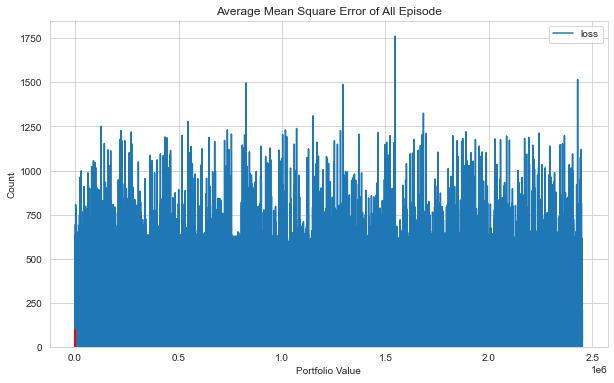

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

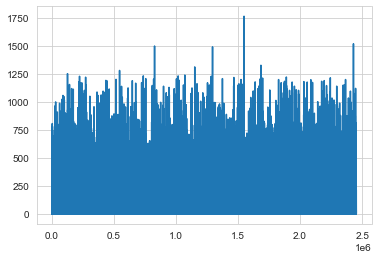

In [5]:
plt.plot(agent.model.losses)

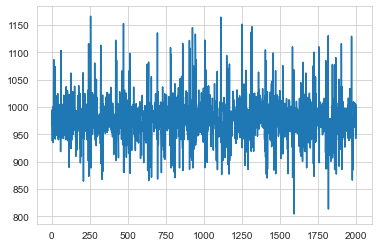

In [6]:
plt.plot(portfolio_value)

episode end value: 966.72, duration: 0:00:00.074856
Sell: 0 times, Buy: 1 times


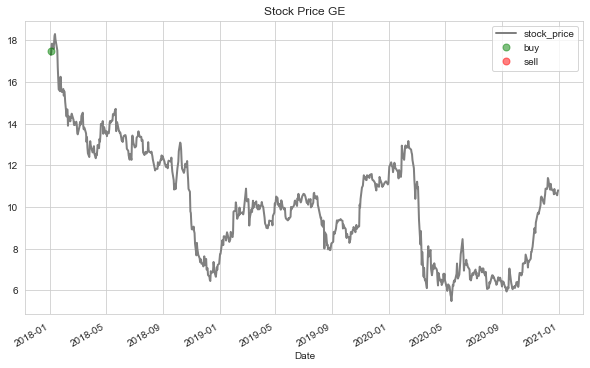

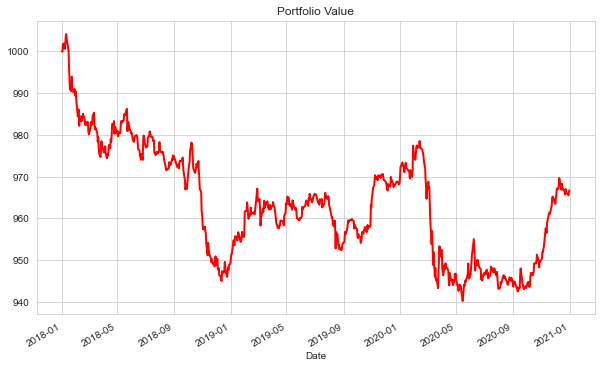

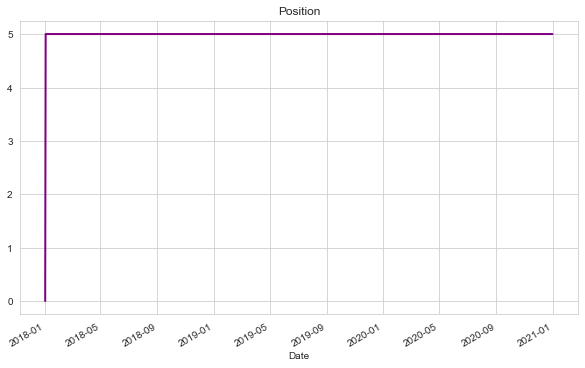

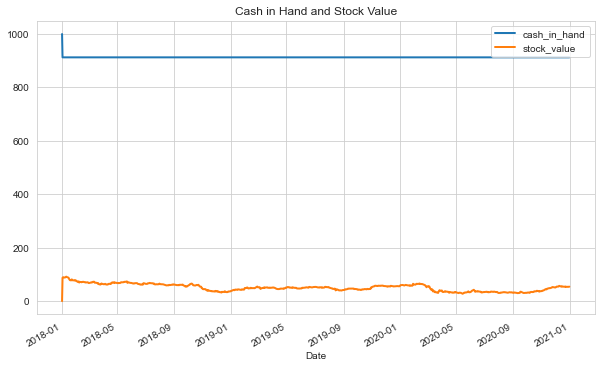

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: GE
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: -1.12 %
Volatility: 0.0233
shape ratio: -0.9519
Maximun drawdown: -6.38 %
Calmar ratio: -0.1760
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -14.52 %
Volatility (benchmark): 0.4918
shape ratio: -0.3175
Maximun drawdown: -69.98 %
Calmar ratio (benchmark): -0.2074


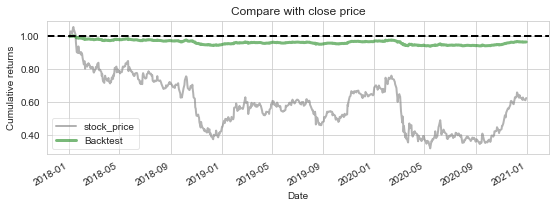

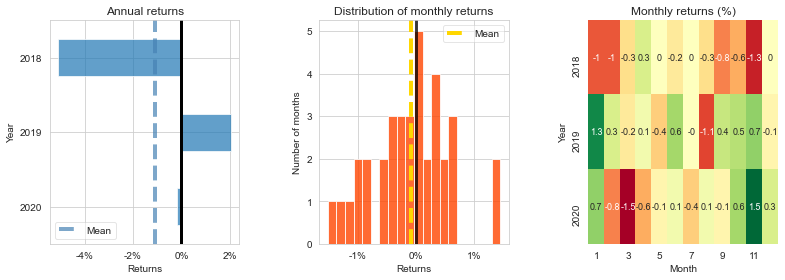

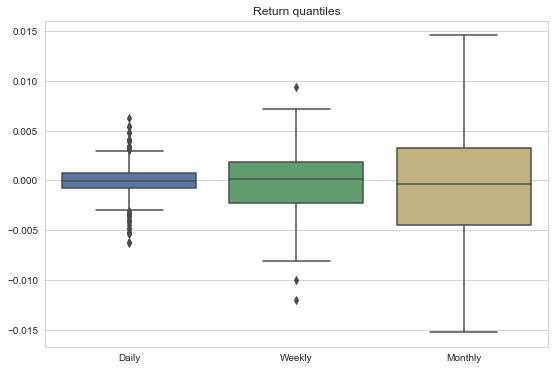

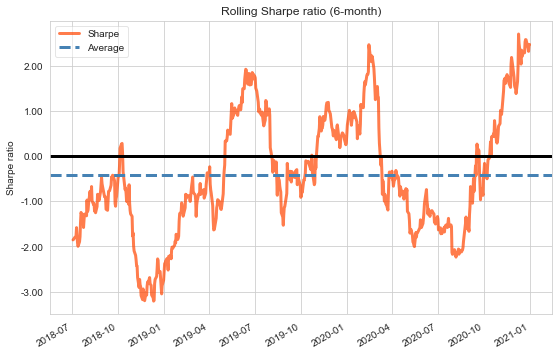

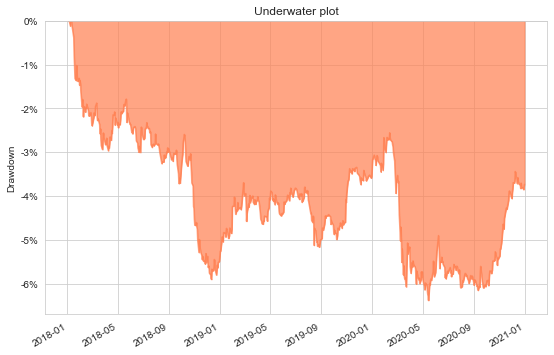

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')